<a href="https://colab.research.google.com/github/umangjpatel/g20-machine-learning/blob/main/Sipakmed_RN18_pretrained_224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 torchtext==0.8.1
! [ -e /content ] && pip install -Uqq fastai
! pip install kaggle

     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 240kB/s 
     |████████████████████████████████| 7.6MB 24.3MB/s 
     |████████████████████████████████| 7.0MB 34.5MB/s 
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: torchtext 0.9.1
    Uninstalling torchtext-0.9.1:
      Successfully uninstalled torchtext-0.9.1
     |████████████████████████████████| 194kB 8.0MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 


In [2]:
from google.colab import files
from pathlib import Path
kaggle_key = (Path(".")) / "kaggle.json"
if not kaggle_key.exists():
  uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download umangjpatel/sipakmed-wsi -p="dataset" --unzip 

100% 6.00G/6.01G [02:22<00:00, 19.0MB/s]
100% 6.01G/6.01G [02:22<00:00, 45.2MB/s]


In [4]:
dataset_path = Path(".") / "dataset"
print("Categories\t\t  | # of images")
print("-" * 40)
for d in dataset_path.iterdir():
  img_count = len([x for x in d.iterdir() if x.is_file() and x.suffix == ".bmp"])
  spaces = " " if "_" in d.name else "\t\t "
  print(f"{d.name}{spaces} | {img_count}")


Categories		  | # of images
----------------------------------------
dyskeratotic		  | 223
parabasal		  | 108
superficial_intermediate  | 126
koilocytotic		  | 238
metaplastic		  | 271


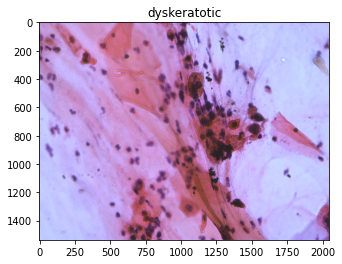

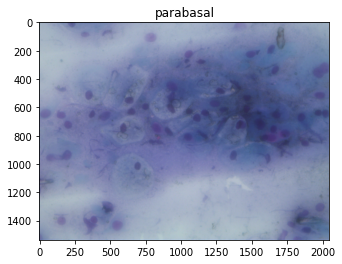

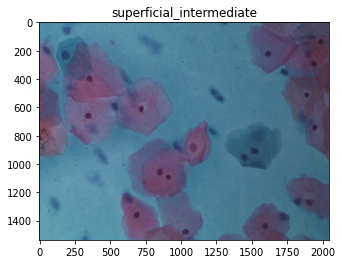

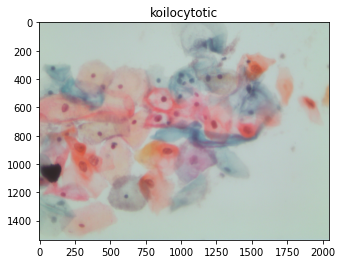

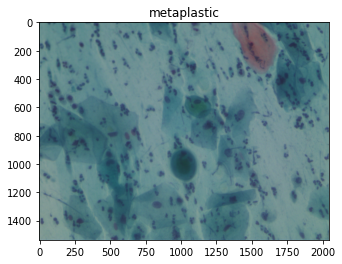

In [5]:
from fastai.vision.all import *
for d in dataset_path.iterdir():
  img, label = Image.open(get_image_files(d)[100]), d.name
  plt.imshow(np.asarray(img))
  plt.title(label)
  plt.show()

In [6]:
dls = ImageDataLoaders.from_folder(path = dataset_path, valid_pct=0.2, 
                                   item_tfms=Resize(224),
                                   batch_tfms = Resize(224),
                                   bs = 64,
                                   seed = 0)
dls

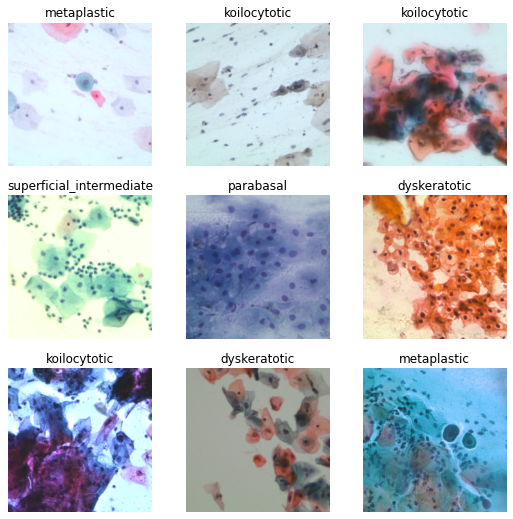

In [7]:
dls.show_batch()

In [8]:
models_dir = Path("models").mkdir(exist_ok=True)
learner = cnn_learner(dls=dls, arch=resnet18, 
                      pretrained=True, 
                      metrics=accuracy, 
                      model_dir=models_dir) 

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [10]:
learner.fine_tune(epochs=2)

epoch,train_loss,valid_loss,accuracy,time
0,0.376673,0.538248,0.844560,03:07


epoch,train_loss,valid_loss,accuracy,time
0,0.269762,0.538806,0.860104,02:55
1,0.243319,0.467646,0.865285,02:53


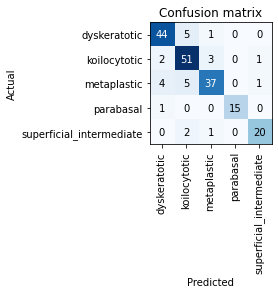

In [12]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()